# Imersão de Dados 4 - Alura - Desafios Dia 3

In [204]:
import pandas as pd

In [205]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(url)

In [206]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
data_ibge = pd.read_csv(ibge_url, encoding = 'UTF-8', sep = ';', decimal=',')

## Pre-processing

In [207]:
data[["Moeda", "ValorAnuncio", "TipoAnuncio"]] = data["Valor"].str.split(expand=True)
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [208]:
data["ValorAnuncio_float"] = data["ValorAnuncio"].str.replace(".", "").astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rua                 6574 non-null   object 
 1   Bairro              9996 non-null   object 
 2   Cidade              10008 non-null  object 
 3   Metragem            10008 non-null  int64  
 4   Quartos             10008 non-null  int64  
 5   Banheiros           10008 non-null  int64  
 6   Vagas               10008 non-null  int64  
 7   Valor               10008 non-null  object 
 8   Moeda               10008 non-null  object 
 9   ValorAnuncio        10008 non-null  object 
 10  TipoAnuncio         852 non-null    object 
 11  ValorAnuncio_float  10008 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 938.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [209]:
properties_to_sell = data[data["TipoAnuncio"].isnull()]
properties_to_sell.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio,ValorAnuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00


In [210]:
properties_to_sell["ValorM2"] = properties_to_sell["ValorAnuncio_float"] / properties_to_sell["Metragem"]
properties_to_sell.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio,ValorAnuncio_float,ValorM2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


In [211]:
data_ibge.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


In [212]:
data_ibge.drop(['Cod_setor', 'Cod_Grandes Regi�es', 'Nome_Grande_Regiao', 'Cod_UF',
           'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
           'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Unnamed: 33', 'Cod_bairro',
           'Nome_do_bairro', 'Cod_subdistrito','Nome_do_subdistrito'],
          axis=1, inplace=True)
data_ibge.head()

,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,S�O PAULO,355030801,�GUA RASA,1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,S�O PAULO,355030801,�GUA RASA,1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,S�O PAULO,355030801,�GUA RASA,1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,S�O PAULO,355030801,�GUA RASA,1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,S�O PAULO,355030801,�GUA RASA,1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [213]:
data_ibge["Nome_do_distrito"] = data_ibge["Nome_do_distrito"].str.replace('�', 'A', regex = True)
data_ibge["Nome_do_distrito"] = data_ibge["Nome_do_distrito"].str.replace('�', 'A', regex = True)
data_ibge.head()

,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,S�O PAULO,355030801,AGUA RASA,1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,S�O PAULO,355030801,AGUA RASA,1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,S�O PAULO,355030801,AGUA RASA,1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,S�O PAULO,355030801,AGUA RASA,1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,S�O PAULO,355030801,AGUA RASA,1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


## 1. Try to link IBGE data with real property data.

In [214]:
def get_upper_district(index):
  return data["Bairro"].str.upper()[index]

In [215]:
district = get_upper_district(4)
data_ibge.query("Nome_do_distrito in @district").head()

,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
10231,S�O PAULO,355030853,MOOCA,1,0,144.00,475.00,3.30,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.00,4602284.67,1893.07,5085711.93
10232,S�O PAULO,355030853,MOOCA,1,0,237.00,599.00,2.53,1.65,2786.70,8855868.62,2909.46,8888968.98,1800.24,5701272.49,2280.59,6128068.86
10233,S�O PAULO,355030853,MOOCA,1,0,114.00,327.00,2.87,1.87,2844.45,44720807.31,2974.93,46399454.77,1654.57,19092875.48,2218.62,24374388.33
10234,S�O PAULO,355030853,MOOCA,1,0,242.00,708.00,2.93,1.99,1406.06,5257960.20,1955.56,6243891.49,1197.88,4135908.31,1771.63,5102681.81
10235,S�O PAULO,355030853,MOOCA,1,0,241.00,684.00,2.84,1.73,3894.89,24871103.65,4045.99,25226133.02,2573.13,17874656.38,3346.15,20663783.21


In [216]:
district = get_upper_district(5)
data_ibge.query("Nome_do_distrito in @district").head()

,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
13610,S�O PAULO,355030871,SANTO AMARO,1,0,264.00,682.00,2.58,1.84,5399.41,78593923.79,7875.39,95226874.42,3546.43,56115238.59,5791.01,78689992.23
13611,S�O PAULO,355030871,SANTO AMARO,1,0,33.00,89.00,2.70,1.03,5075.76,25121893.94,6979.17,21090416.67,3579.94,18222210.18,5755.98,16744224.02
13612,S�O PAULO,355030871,SANTO AMARO,1,0,323.00,770.00,2.38,1.52,5341.89,80703640.81,5991.08,86642653.53,3944.48,69025864.69,5359.68,86238720.40
13613,S�O PAULO,355030871,SANTO AMARO,1,0,264.00,732.00,2.77,1.58,6182.25,51400520.47,6634.61,52163404.87,3680.67,31002970.15,5034.30,35599784.70
13614,S�O PAULO,355030871,SANTO AMARO,1,0,272.00,731.00,2.69,1.65,9258.20,68143359.79,9760.59,66932816.70,5003.65,50541102.48,7154.06,56891231.29


## 2. Process outliers and compare with the results.

In [217]:
data.describe()

,Metragem,Quartos,Banheiros,Vagas,ValorAnuncio_float
count,10008.00,10008.00,10008.00,10008.00,10008.00
mean,442.30,3.48,3.88,4.10,2794169.56
std,7515.38,1.06,1.99,2.82,3866248.54
min,10.00,1.00,1.00,1.00,1650.00
25%,173.00,3.00,2.00,2.00,750000.00
50%,290.00,3.00,4.00,4.00,1600000.00
75%,460.25,4.00,5.00,5.00,3350000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [218]:
clean_data = data.query("Metragem < 3000 & ValorAnuncio_float < 100000")
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 11 to 10006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rua                 465 non-null    object 
 1   Bairro              845 non-null    object 
 2   Cidade              847 non-null    object 
 3   Metragem            847 non-null    int64  
 4   Quartos             847 non-null    int64  
 5   Banheiros           847 non-null    int64  
 6   Vagas               847 non-null    int64  
 7   Valor               847 non-null    object 
 8   Moeda               847 non-null    object 
 9   ValorAnuncio        847 non-null    object 
 10  TipoAnuncio         845 non-null    object 
 11  ValorAnuncio_float  847 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 86.0+ KB


In [219]:
top10districts = properties_to_sell["Bairro"].value_counts()[:10].index
top10districts

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Property price

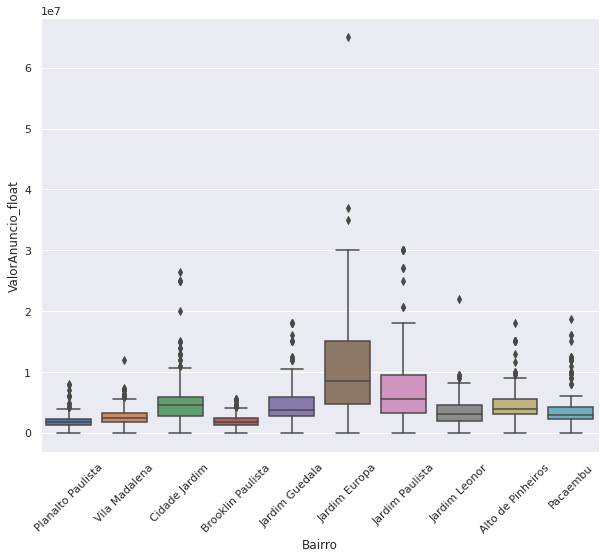

In [221]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=data.query("Bairro in @top10districts"), x="Bairro", y="ValorAnuncio_float")
plt.xticks(rotation=45)
plt.show()

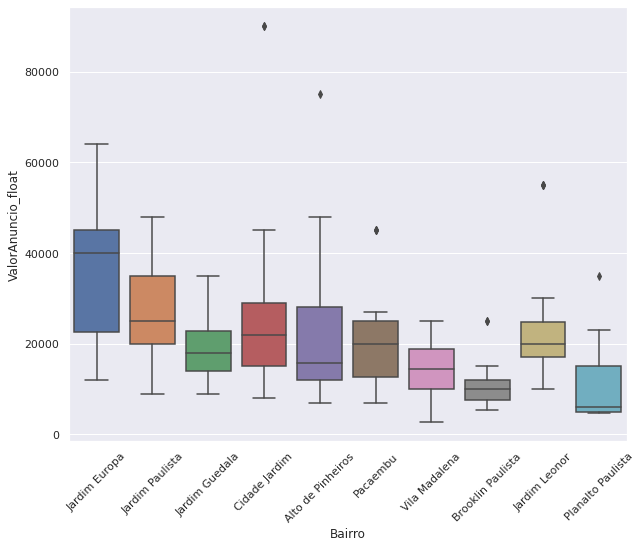

In [222]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=clean_data.query("Bairro in @top10districts"), x="Bairro", y="ValorAnuncio_float")
plt.xticks(rotation=45)
plt.show()

Property size

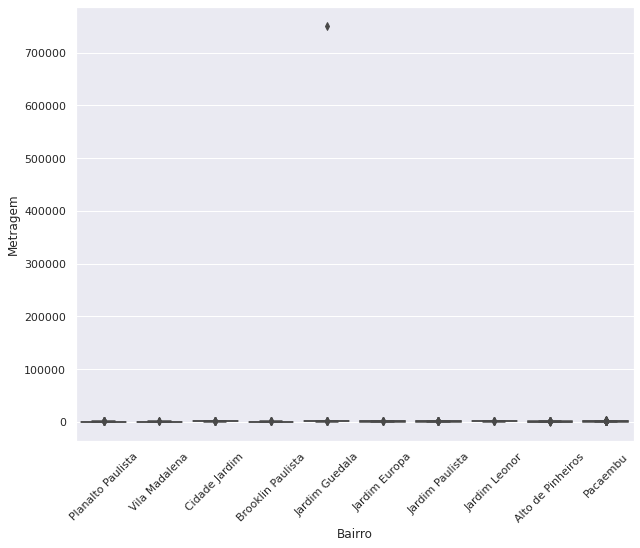

In [223]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=data.query("Bairro in @top10districts"), x="Bairro", y="Metragem")
plt.xticks(rotation=45)
plt.show()

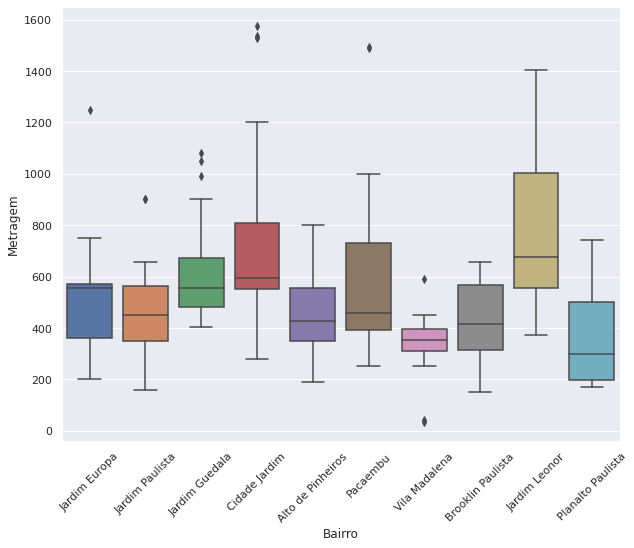

In [224]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=clean_data.query("Bairro in @top10districts"), x="Bairro", y="Metragem")
plt.xticks(rotation=45)
plt.show()

Rooms

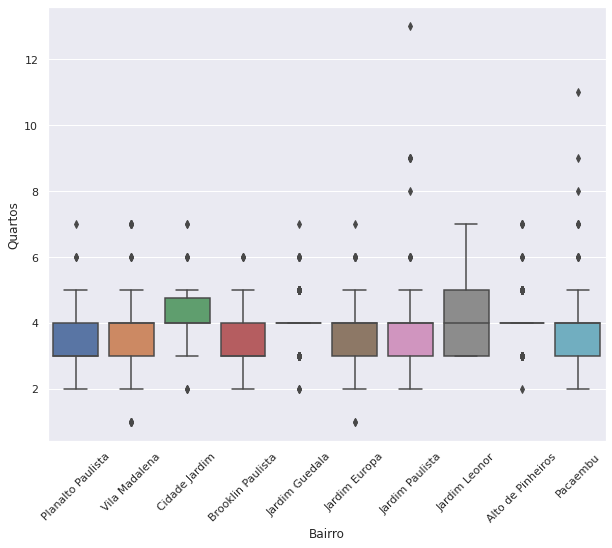

In [225]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=data.query("Bairro in @top10districts"), x="Bairro", y="Quartos")
plt.xticks(rotation=45)
plt.show()

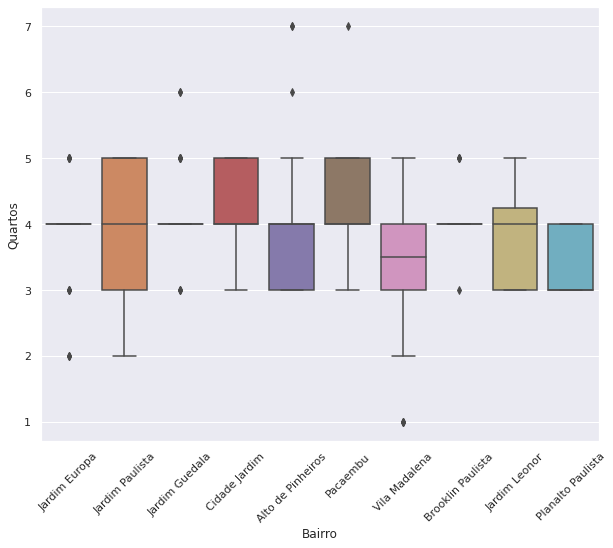

In [226]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=clean_data.query("Bairro in @top10districts"), x="Bairro", y="Quartos")
plt.xticks(rotation=45)
plt.show()

Bathrooms

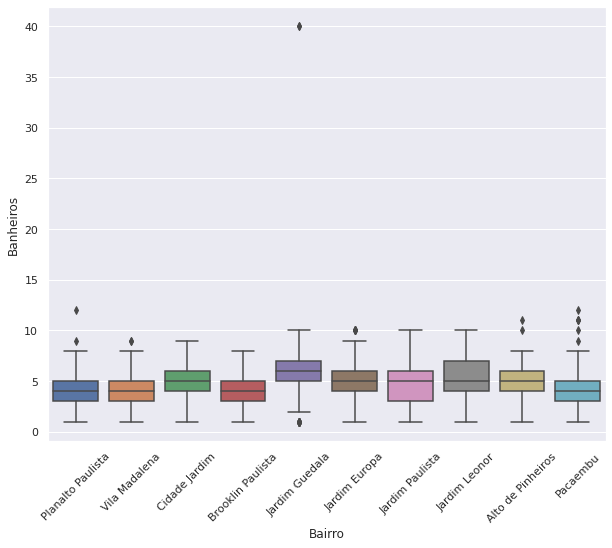

In [227]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=data.query("Bairro in @top10districts"), x="Bairro", y="Banheiros")
plt.xticks(rotation=45)
plt.show()

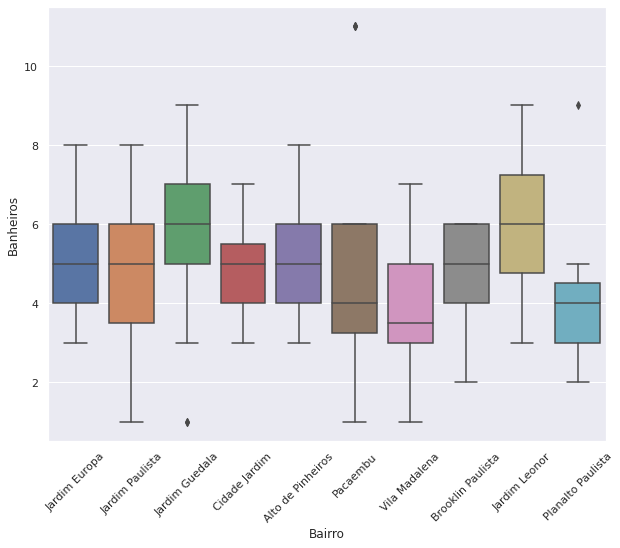

In [228]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=clean_data.query("Bairro in @top10districts"), x="Bairro", y="Banheiros")
plt.xticks(rotation=45)
plt.show()

## 3. Group by more than one category and analyse.

In [229]:
vilamariana = properties_to_sell[properties_to_sell["Bairro"] == "Vila Mariana"]
vilamariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio,ValorAnuncio_float,ValorM2
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000,R$,1.350.000,None,1350000.00,5400.00
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000,R$,2.450.000,None,2450000.00,9800.00
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000,R$,1.490.000,None,1490000.00,8764.71
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000,R$,2.200.000,None,2200000.00,9649.12
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000,R$,1.700.000,None,1700000.00,4857.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000,R$,1.650.000,None,1650000.00,5789.47
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None,1650000.00,9649.12
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000,R$,1.650.000,None,1650000.00,9649.12
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000,R$,1.500.000,None,1500000.00,5454.55


Regarding square meter prices, as we observe in the following table, the more expensive and the cheapest properties in Vila Mariana have 3 rooms and 2 bathrooms. However, in terms of parking space, the cheapest property has 3 while the more expensive has 5.

In [230]:
vilamariana.groupby(['Bairro', 'Quartos'])["ValorM2"].describe()

count    mean     std     min     25%     50%      75%  \
Bairro       Quartos                                                           
Vila Mariana 1         2.00 6691.18 1143.85 5882.35 6286.76 6691.18  7095.59   
             2         9.00 7365.85 1974.26 4756.76 6625.00 7391.30  7727.27   
             3       101.00 8101.44 3414.76 3035.71 5844.16 7413.79  9649.12   
             4        46.00 7814.95 2900.43 3209.88 5948.59 7644.22  8679.48   
             5         6.00 8183.19 4142.21 3708.92 4478.99 8524.03 10667.29   
             6         3.00 5271.83  387.61 4857.14 5095.24 5333.33  5479.17   
             7         1.00 8000.00     NaN 8000.00 8000.00 8000.00  8000.00   
             11        1.00 7000.00     NaN 7000.00 7000.00 7000.00  7000.00   

                          max  
Bairro       Quartos           
Vila Mariana 1        7500.00  
             2       11250.00  
             3       22400.00  
             4       19862.07  
             5       13829.79  
             6        5625.00  
             7        8000.00  
             11       7000.00

In [231]:
vilamariana.groupby(['Bairro', 'Banheiros'])["ValorM2"].describe()

count    mean     std     min     25%     50%     75%  \
Bairro       Banheiros                                                          
Vila Mariana 1          15.00 7023.92 2520.58 3708.92 5103.81 6250.00 9212.31   
             2          36.00 7663.04 3230.82 3035.71 6005.74 6992.78 8945.57   
             3          53.00 8222.20 3702.29 3545.45 5714.29 7409.84 8720.93   
             4          35.00 8272.39 2347.87 3209.88 6827.78 8125.00 9869.05   
             5          21.00 7583.04 2496.66 3993.06 5892.86 7200.00 8000.00   
             6           8.00 7842.67 5198.49 4318.94 4373.65 6518.52 7765.62   
             8           1.00 8800.00     NaN 8800.00 8800.00 8800.00 8800.00   

                            max  
Bairro       Banheiros           
Vila Mariana 1         11250.00  
             2         22400.00  
             3         18750.00  
             4         13181.82  
             5         13829.79  
             6         19862.07  
             8          8800.00

In [232]:
vilamariana.groupby(['Bairro', 'Vagas'])["ValorM2"].describe()

count    mean     std     min     25%     50%     75%  \
Bairro       Vagas                                                          
Vila Mariana 1      30.00 7258.19 3390.34 3209.88 5006.67 6587.50 8634.83   
             2      58.00 8187.80 2573.97 3947.37 6702.19 8116.55 9119.28   
             3      33.00 7975.53 3981.08 3035.71 5882.35 7200.00 8474.58   
             4      21.00 7769.57 2336.95 3708.92 6000.00 7543.86 9649.12   
             5      12.00 8434.07 4735.33 5789.47 5955.56 6351.15 8631.58   
             6       7.00 8068.07 2019.80 5454.55 6708.88 7916.67 9389.20   
             7       2.00 5803.74  140.06 5704.70 5754.22 5803.74 5853.26   
             8       3.00 8125.95 4952.12 4923.08 5274.04 5625.00 9727.39   
             10      3.00 8220.35 2914.28 4857.14 7330.53 9803.92 9901.96   

                        max  
Bairro       Vagas           
Vila Mariana 1     19862.07  
             2     15306.12  
             3     18750.00  
             4     12857.14  
             5     22400.00  
             6     10909.09  
             7      5902.78  
             8     13829.79  
             10    10000.00

## 4. Organize the colab to make it look like a project.

At the end of the course I will make an organized notebook with the most relevant analyses.